# ¡Hola Audrey! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también. Al final del notebook, te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Comenzaremos por importar pandas para poder leer los archivos CSV y crearemos un dataframe para cada archivo, posteriormente leeremos los datasets y mostraremos la informacion de nuestros datos utilizando info(). y veremos los primeros 5 datos de nuestro dataframe.

In [1]:
# importar librerías

import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames

# Comence a leerlos sin separador y pude notar que los datos venian separados con ';'

instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products = pd.read_csv('/datasets/products.csv',sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Buen trabajo importante las liberías necesarias y los datasets del proyecto.

</div>

In [3]:
# mostrar información del DataFrame
display(instacart_orders.head())
print(instacart_orders.info(show_counts=True))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# mostrar información del DataFrame
print(products.head())
print(products.info(show_counts=True))

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

In [5]:
# mostrar información del DataFrame
display(aisles.head())
print(aisles.info(show_counts=True))

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame
display(departments.head())
print(departments.info(show_counts=True))

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame
display(order_products.head())
print(order_products.info(show_counts=True))   #Actualizado, Gracias

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Sobre nuestros 5 datasets podemos observar lo siguiente: 

*Tenemos datos tipo Object
*Todos nuestros datasets son de una columna
*Podemos ver que el separados de los datos es un ';' entonces cambiamos el delimitador desde la lectura de los archivos
*Contamos con datos nulos en el dataset 'products' y en el dataset instacart_orders

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Audrey excelente trabajo mostrando la información de los datasets. Ten en cuenta que si un dataset tiene muchas filas (como lo es el caso de **order_products**) la función `info` no mostrará la columna *Non-Null Count*, si quieres ver esta información debes usar lo siguiente:
    
    order_products.info(show_counts=True)

</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Comenzaremos por encontrar los duplicados en cada dataframe intentando analizar las columnas y posteriormente los corregiremos y procederemos a checar los valores ausentes y eliminar los duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum())
display(instacart_orders[instacart_orders.duplicated()])

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Contamos con 15 datos duplicados, todos del dia Miercoles a las 2am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
display(miercoles)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? Tenemos las ordenes que se estan tomando como duplicados ya que ocurrieron a la misma hora en el mismo dia. Pero podemos observar que son 121 datos ocurridos el miercoles a las 2am por lo que habria eliminar los 15 datos repetidos y vemos que no todos los datos del miercoles son duplicados.

In [10]:
# Elimina los pedidos duplicados

instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
order_duplicated=instacart_orders['order_id'].duplicated().sum()
print(order_duplicated)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Logramos borrar los 15 duplicados logrando que nuestra tabla de instacart_duplicated este limpia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Muy buen trabajo

</div>

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [14]:
# Verifica si hay IDs duplicadas de productos
print(products['product_id'].duplicated().sum())

0


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

print(products[products['product_name'].duplicated()])
duplicates_count = products['product_name'].str.upper().duplicated().sum()
print(duplicates_count)


       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]
1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

products[~products['product_name'].isna()]['product_name'].str.upper().duplicated().sum()


104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los duplicados eran valores NaN entonces utiliice isna() y el simbolo ~ para no contarlos. Pudimos ver que 1257 duplicados eran solo valores NaN pero al cambiar los nombres de los productos a mayusculas nuestros duplicados aumentaron a 1361 por lo que hay 104 duplicados por nombre.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto Audrey 

</div>

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())
print(departments.head())

0
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [18]:
# Revisa si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [20]:
# Revisa si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontramos datos duplicados en este dataframe ni en la columna de ID en especifico. 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products.info())
print(order_products.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[['product_id', 'order_id']].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Buscamos duplicados generales y no tenemos pero para ser mas especificos y cuidadosos con el dataframe checamos duplicados en las columnas especificas de product_id y order_id

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente trabajo Audrey, has hecho una verificación correcta de los datasets.

</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())
print(products.isna().sum())

1258
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Podemos ver que  contamos con valores ausentes en la columna product_name solamente con una cantidad de 1258

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print((products['product_name'].isna() & (products['aisle_id'] == 100)).sum())



1258


Describe brevemente cuáles son tus hallazgos.

Podemos ver que en nuestro dataset los duplicados están relacionaddos con el pasillo 100 ya que contenemos el mismo numero de duplicados.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print((products['product_name'].isna() & (products['department_id'] == 21)).sum())


1258


Describe brevemente cuáles son tus hallazgos.

Tambien podemos observar que los departamentos contienen el mismo numero de duplicados por lo que estariamos relacionando los duplicados con el pasillo 100 y el departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(departments[departments['department_id'] == 21])
print(aisles[aisles['aisle_id'] == 100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

No contamos con departamento con id 21 y pasillo con id 100 por lo que nuestros datos con informacion faltante pertencen a estos dos departamentos

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. 
Logramos llenar nuestros nombres de producto con valores ausentes con la palabra Unknown

### `orders` data frame

In [28]:
# Encuentra los valores ausentes

print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders['days_since_prior_order']=instacart_orders['days_since_prior_order'].fillna('0')
print(instacart_orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La unica columna donde podemos ver valores ausentes en en day_since_prior_order ya que no existe un valor antecedente al dia 1 por lo que llenamos esos valores ausentes con 0

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes

print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
print(min_value)
max_value = order_products['add_to_cart_order'].max()
print(max_value)

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

El valor minimo es de 1 producto  
El valor máximo es de 64 productos

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_orders = order_products[order_products['add_to_cart_order'].isna()]
print(missing_orders)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo

product_counts = order_products[order_products['order_id'].isin(missing_orders['order_id'])].groupby('order_id')['product_id'].count().sort_values()
print(product_counts)

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos. 

Se confirma la primera pregunta ya que los valores ausentes tienen mas de 64 productos

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order']=order_products['add_to_cart_order'].fillna(999).astype('int')
print(order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

remplazamos los valores ausentes a 999

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Pudimos analizar varios valores ausentes y duplicados en diferentes datasets y logramos analizar varias columnas y la razon de los datos faltantes/datos duplicados para futuros analisis.  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Gran trabajo con el manejo de los datos faltantes.

</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(instacart_orders.iloc[:,3:5].describe())

           order_dow  order_hour_of_day
count  478952.000000      478952.000000
mean        2.775051          13.447034
std         2.045901           4.224567
min         0.000000           0.000000
25%         1.000000          10.000000
50%         3.000000          13.000000
75%         5.000000          16.000000
max         6.000000          23.000000


In [36]:
print(instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                478952 non-null  int64 
 1   user_id                 478952 non-null  int64 
 2   order_number            478952 non-null  int64 
 3   order_dow               478952 non-null  int64 
 4   order_hour_of_day       478952 non-null  int64 
 5   days_since_prior_order  478952 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.9+ MB
None


Escribe aquí tus conclusiones Los datos son sensibles podemos ver que los valores maximos son 6 y 23  para cada columna

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Bien hecho Audrey

</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

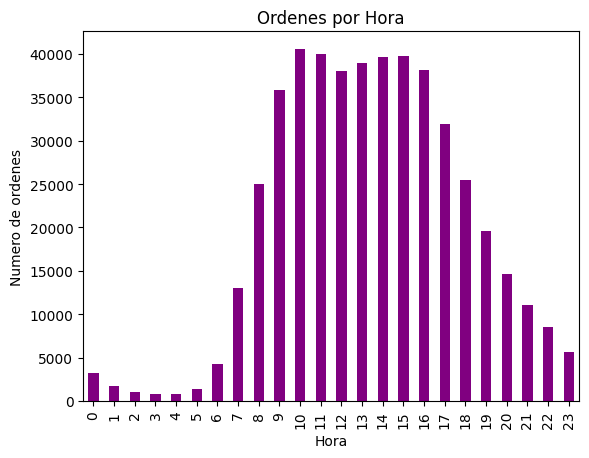

In [37]:
hourly_orders=instacart_orders['order_hour_of_day'].value_counts().sort_index()
hourly_orders.plot(title='Ordenes por Hora', xlabel='Hora',ylabel='Numero de ordenes',kind='bar',color='purple')
plt.show()

Escribe aquí tus conclusiones
Podemos ver que los horarios con mas numero de ordenes es entre las 9am y las 5pm.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
La gráfica obtenida está muy bien.
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

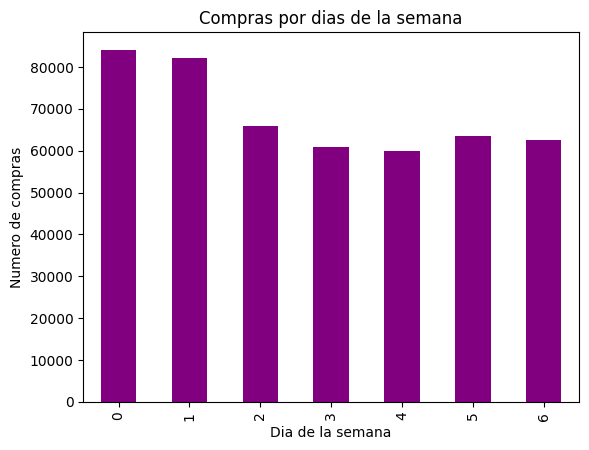

In [38]:
dia_semana=instacart_orders['order_dow'].value_counts().sort_index()
dia_semana.plot(title='Compras por dias de la semana',xlabel='Dia de la semana',ylabel='Numero de compras',kind='bar',color='purple')
plt.show()

Escribe aquí tus conclusiones

Domingo y lunes son los dias con  mas pedidos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente Audrey

</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

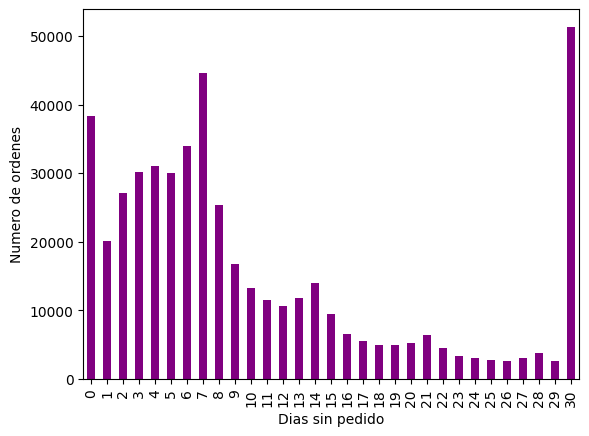

In [39]:
instacart_orders['days_since_prior_order'] = pd.to_numeric(instacart_orders['days_since_prior_order'], errors='coerce').fillna(0).astype(int)
# mi columna estaba como object
dias_spedido=instacart_orders['days_since_prior_order'].value_counts().sort_index()
dias_spedido.plot(kind='bar',xlabel='Dias sin pedido',ylabel='Numero de ordenes',color='purple')
plt.show()

Escribe aquí tus conclusiones

La gente se queda tarda maximo 30 dias sin hacer pedido o 7 dias sin hacer pedido

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente trabajo Audrey.

</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

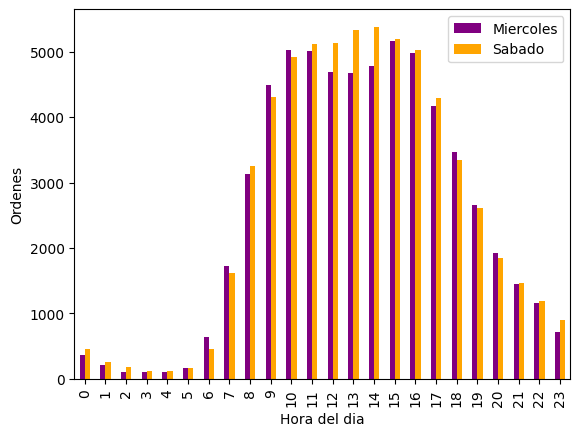

In [40]:
dias = instacart_orders[(instacart_orders['order_dow'] == 3) | (instacart_orders['order_dow'] == 6)]

instacart_df = pd.DataFrame({
    'Miercoles': instacart_orders[instacart_orders["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index(),
    'Sabado': instacart_orders[instacart_orders["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
})

instacart_df.plot(kind='bar',xlabel='Hora del dia',ylabel='Ordenes',color=['purple','orange'])
plt.show()

# Podemos ver que tienen una tendencia parecida

Escribe aquí tus conclusiones

Podemos ver que tienen una tendencia parecida ambos dias.Pero siempre el sabado lo podemos ver con mas numero de ordenes

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Has obtenido la gráfica correcta.

</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

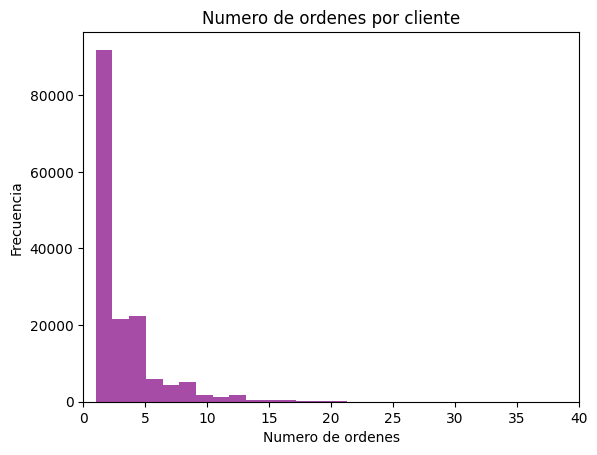

In [41]:
ord_cliente = instacart_orders.groupby('user_id')['order_id'].count()

ord_cliente.plot(kind='hist', color='purple', bins=20, alpha=0.7) ##actualizado
plt.xlim(0, 40)
plt.xlabel('Numero de ordenes') 
plt.ylabel('Frecuencia')
plt.title('Numero de ordenes por cliente') 

plt.show()


Escribe aquí tus conclusiones

Vemos que los usuarios regularmente realizan un pedido como minimo.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
El histograma obtenido está bien, aunque si queremos obtener más información podríamos aumentar la cantidad de barras/bins, para tener una mejor visualización de la distribución.

</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
display(order_products.head())
print()
display(products.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [43]:
products_id = products.merge(order_products, on='product_id')
popular = products_id.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)
print(popular)


product_id  product_name                                          
24852       Banana                                                    66050
13176       Bag of Organic Bananas                                    53297
21137       Organic Strawberries                                      37039
21903       Organic Baby Spinach                                      33971
47209       Organic Hass Avocado                                      29773
                                                                      ...  
5836        Arctic D Cod Liver Oil Lemon                                  1
43573       Whisk- 10 Inch                                                1
43570       Queso Cotija                                                  1
36174       Whole Pinto Beans                                             1
41403       Extra Rich & Thick Spaghetti Sauce Spices & Seasonings        1
Name: order_id, Length: 45573, dtype: int64


product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

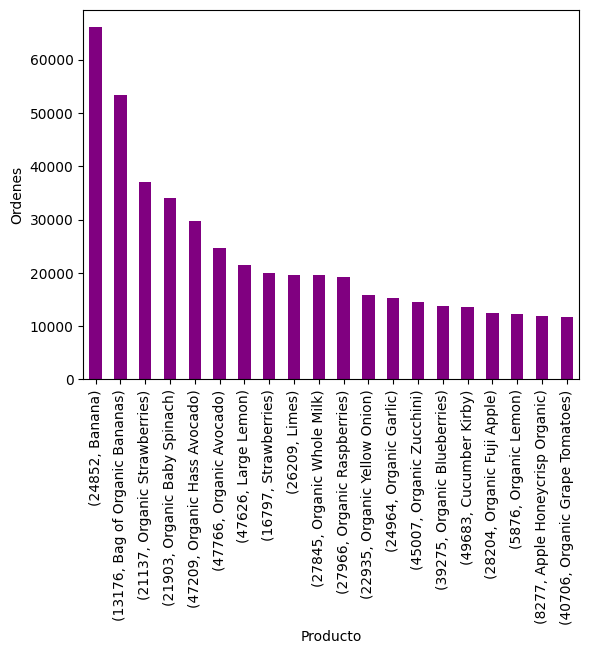

In [44]:
popular_20=popular.head(20)
print(popular_20)

popular_20.plot(kind='bar',xlabel='Producto',ylabel='Ordenes',color='purple')
plt.show

Escribe aquí tus conclusiones
La banana es el producto mas ordenado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
La información obtenida es la correcta. Buen trabajo Audrey

</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
juntar_data = instacart_orders.merge(products_id, on="order_id")

In [46]:
arti_pers = juntar_data.groupby("order_id")["product_id"].count().sort_values(ascending=False)
arti_pers.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Text(0.5, 1.0, 'Numero de articulos')

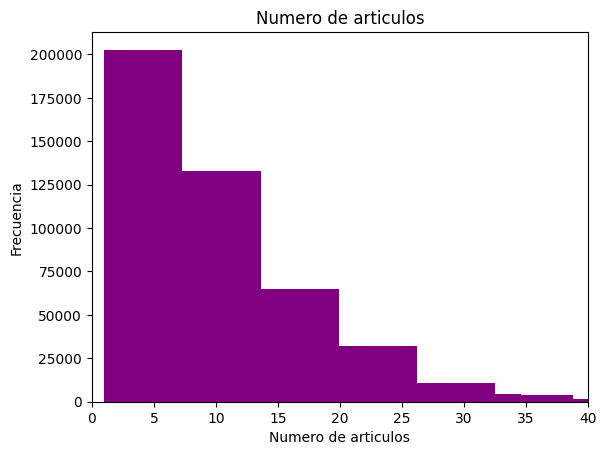

In [47]:
arti_pers.plot(kind='hist',xlabel='Numero de articulos',color='purple',bins=20) ## actualizado
plt.show

arti_pers.plot(kind='hist', color='purple', bins=30) 
plt.xlim(0, 40) 
plt.xlabel('Numero de articulos') 
plt.ylabel('Frecuencia') 
plt.title('Numero de articulos')

Escribe aquí tus conclusiones

En promedio los clientes llevan 10 productos por pedido

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Acá sucede lo mismo del histograma anterior, ya que las barras/bins son muy grandes no se logra apreciar en detalle la distribución. Te sugiero aumentar la cantidad de barras de la distribución y reducir el eje X hasta 40, ya que como logras ver, la mayoría de los datos están en un rango de 1 a 40. También es importante incluir el nombre de ambos ejes y el título de la gráfica.

</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
mejores_reorden = products_id[products_id['reordered'] == 1].groupby(['product_id', 'product_name'])['reordered'].sum().sort_values(ascending=False)
mejores_reorden_20=(mejores_reorden.head(20))
mejores_reorden_20


product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: reordered, dtype: int64

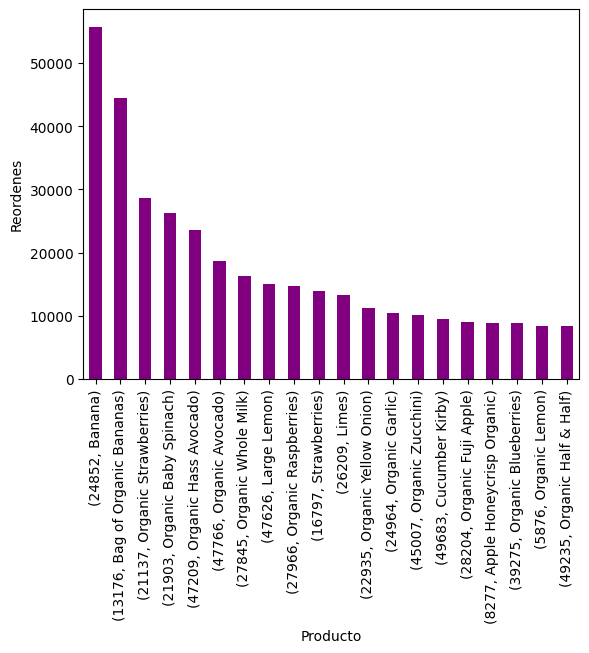

In [49]:
mejores_reorden_20.plot(kind='bar', xlabel='Producto', ylabel='Reordenes',color='purple')
plt.show()


Escribe aquí tus conclusiones

Podemos ver que el platano y sus variaciones tambien estan en los primeros lugares

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Tu idea es buena para obtener la información necesaria, pero al usar la función `count`, estás contando los datos que no son NaN, en este caso para la columna **reordered**, tenemos valores de 0 y 1, y todos se están contando, pero realmente solo nos interesa los artículos donde se cumpla que `reordered = 1`. Incluye esta condición en tu código y podrás ver cómo los valores cambian y corresponden a la inforamción que se está pidiendo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Buen trabajo con los ajustes Audrey

</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [50]:
products_id.groupby(["product_id","product_name"])["reordered"].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones 
Podemos ver que el producto 'HIGH PERFORMANCE ENERGY DRINK' tiene una gran proporcion de reorden ya que se vuelve a pedir casi el 80% de las veces. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto Audrey

</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [51]:
prop_reorder= juntar_data.groupby(["user_id"])["reordered"].mean()
prop_reorder

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

la gente vuelve  a repetir sus productos muy diferente pero el porcentaje mas grande que vemos es del cliente con ID 206207 quien ha reordenado un 89% de las veces sus productos. El promedio seria de un 49% que cada cliente vuelve a pedir sus productos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Muy buen trabajo!!

</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [52]:
top_primeros = juntar_data[juntar_data["add_to_cart_order"] == 1].groupby(["product_id", "product_name"])["add_to_cart_order"].count().sort_values(ascending=False).head(20)
print(top_primeros)


product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

<AxesSubplot:xlabel='Productos', ylabel='Veces que se agregaron primero'>

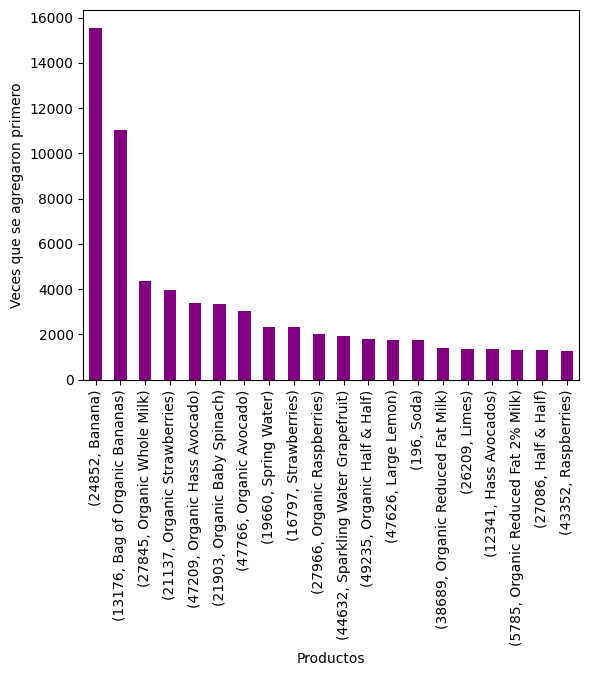

In [53]:
top_primeros.plot(kind='bar',xlabel='Productos',ylabel='Veces que se agregaron primero',color='purple')

Escribe aquí tus conclusiones

Vemos que las frutas son altamente requeridas, en especial las organicas

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Magnifíco trabajo!

</div>

### Conclusion general del proyecto:

Para el negocio de instacart podriamos enviar un recordatorio/notificacion a los clientes que pasan mas de 30 dias sin pedido. Tambien vemos muy buena demanda en las frutas por lo que es recomendabe siempre tener la cantidad que satisfaga la demanda y por ultimo seria recomendable dar una promocion los dias jueves ya que es el dia con ordenes mas bajo.

-----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Audrey, tu desempeño en este proyecto del programa de data scientist ha sido realmente impresionante. Tu Análisis Exploratorio de Datos (EDA) fue excelente, demostrando una sólida comprensión de los conceptos fundamentales y una habilidad notable para extraer insights valiosos. Es particularmente notable cómo has respondido de manera sobresaliente a la mayoría de las preguntas, incluyendo tus propias apreciaciones, lo cual añade un valor significativo a tu análisis. Esta práctica no solo enriquece tu proyecto, sino que también refleja tu capacidad para pensar críticamente sobre los datos. Sin embargo, te sugiero revisar una de las preguntas donde es necesario considerar únicamente los productos que fueron reordenados. Este pequeño ajuste elevará aún más la calidad de tu trabajo y te hará cumplir con todos los objetivos de tu proyecto. Estaré atento a tu próxima iteración ✅

</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    


</div>